In [1]:
#Importing the required packages
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


%cd C:\Users\Harika\Documents\Hackathon\Sapient_Hackathon_Aug 18

C:\Users\Harika\Documents\Hackathon\Sapient_Hackathon_Aug 18


In [2]:
#Importing all datasets
df_train = pd.read_csv('application_train.csv')
df_test1 = pd.read_csv('application_test.csv')

In [3]:
df_test = df_test1.copy()

In [4]:
#Check the dimensions of the Dataframe
print(df_train.shape)

df_test.shape

(257512, 122)


(49999, 121)

In [5]:
#Looking at the statistical aspects of the dataframe
df_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,257512.000000,257512.000000,257512.000000,2.575120e+05,2.575120e+05,257501.000000,2.572720e+05,257512.000000,257512.000000,257512.000000,...,257512.000000,257512.000000,257512.000000,257512.000000,222727.000000,222727.000000,222727.000000,222727.000000,222727.000000,222727.000000
mean,307143.115397,0.080769,0.416509,1.684155e+05,5.988950e+05,27108.806240,5.382673e+05,0.020882,-16039.898366,63930.692845,...,0.008058,0.000575,0.000505,0.000326,0.006268,0.006901,0.034747,0.266833,0.266348,1.903653
std,86047.050997,0.272481,0.721749,1.105872e+05,4.025061e+05,14480.289657,3.693680e+05,0.013845,4364.493540,141368.981432,...,0.089403,0.023967,0.022463,0.018058,0.083078,0.111287,0.206680,0.913544,0.825488,1.870100
min,157876.000000,0.000000,0.000000,2.610000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,232638.750000,0.000000,0.000000,1.125000e+05,2.700000e+05,16542.000000,2.385000e+05,0.010006,-19689.000000,-2756.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,307140.500000,0.000000,0.000000,1.476000e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15753.000000,-1212.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,381476.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12420.000000,-288.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.800009e+07,4.050000e+06,230161.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,22.000000


In [6]:
#Removing unwanted columns
df_train = df_train.drop(['SK_ID_CURR'], axis = 1)

df_train = df_train.replace('XNA', np.nan)

df_test = df_test.drop(['SK_ID_CURR'], axis = 1)

df_test = df_test.replace('XNA', np.nan)

In [7]:
#Checking for missing values percentage
percent_missing = (((df_train.isnull() | df_train.isna()).sum() * 100 / df_train.index.size).sort_values(ascending=False))
print(percent_missing.to_string())

COMMONAREA_AVG                  69.862764
COMMONAREA_MODE                 69.862764
COMMONAREA_MEDI                 69.862764
NONLIVINGAPARTMENTS_MEDI        69.433657
NONLIVINGAPARTMENTS_AVG         69.433657
NONLIVINGAPARTMENTS_MODE        69.433657
FONDKAPREMONT_MODE              68.386716
LIVINGAPARTMENTS_AVG            68.335845
LIVINGAPARTMENTS_MEDI           68.335845
LIVINGAPARTMENTS_MODE           68.335845
FLOORSMIN_MEDI                  67.860139
FLOORSMIN_MODE                  67.860139
FLOORSMIN_AVG                   67.860139
YEARS_BUILD_MEDI                66.501367
YEARS_BUILD_AVG                 66.501367
YEARS_BUILD_MODE                66.501367
OWN_CAR_AGE                     66.008186
LANDAREA_MEDI                   59.363835
LANDAREA_AVG                    59.363835
LANDAREA_MODE                   59.363835
BASEMENTAREA_AVG                58.538631
BASEMENTAREA_MODE               58.538631
BASEMENTAREA_MEDI               58.538631
EXT_SOURCE_1                    56

In [9]:
#Removing the columns with more that 45% of missing values
missing_features = percent_missing[percent_missing > 45].index
df_train.drop(missing_features, axis=1, inplace=True)

df_test.drop(missing_features, axis=1, inplace=True)

df_train.shape

(257512, 72)

In [10]:
#Checking the number of columns in each datatype
df_train.dtypes.value_counts()

int64      41
float64    19
object     12
dtype: int64

In [11]:
#Imputing numerical data with missing values using mean for training set
df_num = df_train.select_dtypes(include=[np.number])
mean_value = df_num.mean()
df_num = df_num.fillna(mean_value)

#Imputing categorical data with missing values using mode for training set
df_cat = df_train.select_dtypes('object')
mode_value = df_cat.mode()
df_cat = df_cat.fillna(mode_value)

#Combining the numerical and categorical data back for training set
df_imputed_train = pd.concat([df_num, df_cat], axis=1)
df_imputed_train.shape

(257512, 72)

In [12]:
#Imputing numerical data with missing values using mean for testing set
df_test_num = df_test.select_dtypes(include=[np.number])
mean_value = df_test_num.mean()
df_test_num = df_test_num.fillna(mean_value)

#Imputing categorical data with missing values using mode for testing set
df_test_cat = df_test.select_dtypes('object')
mode_value = df_test_cat.mode()
df_test_cat = df_test_cat.fillna(mode_value)

#Combining the numerical and categorical data back for testing set
df_imputed_test = pd.concat([df_test_num, df_test_cat], axis=1)
df_imputed_test.shape

(49999, 71)

In [13]:
# Creating a new column Age using DAYS_BIRTH for training data
df_imputed_train['Age'] = (df_imputed_train['DAYS_BIRTH']/365).round()
df_imputed_train['Age'] = pd.to_numeric(df_imputed_train['Age'].astype(str).str.replace('-',''))

# Bin the Age data
df_imputed_train['YEARS_BINNED'] = pd.cut(df_imputed_train['Age'], bins = np.linspace(20, 70, num = 10))

In [14]:
# Creating a new column Age using DAYS_BIRTH for testing data
df_imputed_test['Age'] = (df_imputed_test['DAYS_BIRTH']/365).round()
df_imputed_test['Age'] = pd.to_numeric(df_imputed_test['Age'].astype(str).str.replace('-',''))

In [15]:
#Checking organization types
df_imputed_train['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    56891
Self-employed             32172
Other                     13966
Medicine                   9376
Business Entity Type 2     8849
Government                 8688
School                     7443
Trade: type 7              6621
Kindergarten               5790
Construction               5655
Business Entity Type 1     5031
Transport: type 4          4561
Trade: type 3              2942
Industry: type 9           2831
Industry: type 3           2736
Security                   2697
Housing                    2469
Industry: type 11          2215
Military                   2176
Bank                       2072
Agriculture                2062
Police                     1975
Transport: type 2          1812
Postal                     1787
Security Ministries        1643
Trade: type 2              1593
Restaurant                 1522
Services                   1291
University                 1105
Industry: type 7           1098
Transport: type 3           996
Industry

In [16]:
#Combining some of the levels of an organization type to create a single level for training data
a = dict.fromkeys(['Business Entity Type 1' , 'Business Entity Type 2' , 'Business Entity Type 3'], 'Business Entity')
b = dict.fromkeys(['Transport: type 1' , 'Transport: type 2' , 'Transport: type 3', 'Transport: type 4'], 'Transport')
c = dict.fromkeys(['Trade: type 1' , 'Trade: type 2' , 'Trade: type 3', 'Trade: type 4', 'Trade: type 5', 'Trade: type 6', 'Trade: type 7'], 'Trade')
d = dict.fromkeys(['Industry: type 1', 'Industry: type 2', 'Industry: type 3', 'Industry: type 4', 'Industry: type 5','Industry: type 6',
                'Industry: type 7', 'Industry: type 8', 'Industry: type 9', 'Industry: type 10', 'Industry: type 11', 'Industry: type 12',
                 'Industry: type 13'], 'Industry')
df_imputed_train['ORGANIZATION_TYPE'] = df_imputed_train['ORGANIZATION_TYPE'].replace(a)
df_imputed_train['ORGANIZATION_TYPE'] = df_imputed_train['ORGANIZATION_TYPE'].replace(b)
df_imputed_train['ORGANIZATION_TYPE'] = df_imputed_train['ORGANIZATION_TYPE'].replace(c)
df_imputed_train['ORGANIZATION_TYPE'] = df_imputed_train['ORGANIZATION_TYPE'].replace(d)

df_imputed_train['ORGANIZATION_TYPE'].value_counts()

Business Entity        70771
Self-employed          32172
Other                  13966
Trade                  12058
Industry               11945
Medicine                9376
Government              8688
Transport               7542
School                  7443
Kindergarten            5790
Construction            5655
Security                2697
Housing                 2469
Military                2176
Bank                    2072
Agriculture             2062
Police                  1975
Postal                  1787
Security Ministries     1643
Restaurant              1522
Services                1291
University              1105
Electricity              803
Hotel                    784
Insurance                508
Telecom                  471
Emergency                467
Advertising              361
Realtor                  335
Culture                  315
Legal Services           261
Mobile                   261
Cleaning                 220
Religion                  71
Name: ORGANIZA

In [17]:
#Combining some of the levels of an organization type to create a single level for testing data
a = dict.fromkeys(['Business Entity Type 1' , 'Business Entity Type 2' , 'Business Entity Type 3'], 'Business Entity')
b = dict.fromkeys(['Transport: type 1' , 'Transport: type 2' , 'Transport: type 3', 'Transport: type 4'], 'Transport')
c = dict.fromkeys(['Trade: type 1' , 'Trade: type 2' , 'Trade: type 3', 'Trade: type 4', 'Trade: type 5', 'Trade: type 6', 'Trade: type 7'], 'Trade')
d = dict.fromkeys(['Industry: type 1', 'Industry: type 2', 'Industry: type 3', 'Industry: type 4', 'Industry: type 5','Industry: type 6',
                'Industry: type 7', 'Industry: type 8', 'Industry: type 9', 'Industry: type 10', 'Industry: type 11', 'Industry: type 12',
                 'Industry: type 13'], 'Industry')
df_imputed_test['ORGANIZATION_TYPE'] = df_imputed_test['ORGANIZATION_TYPE'].replace(a)
df_imputed_test['ORGANIZATION_TYPE'] = df_imputed_test['ORGANIZATION_TYPE'].replace(b)
df_imputed_test['ORGANIZATION_TYPE'] = df_imputed_test['ORGANIZATION_TYPE'].replace(c)
df_imputed_test['ORGANIZATION_TYPE'] = df_imputed_test['ORGANIZATION_TYPE'].replace(d)


EDA:
Univariate Asalysis

In [18]:
#Checking the number of people churned
df_imputed_train['TARGET'].value_counts()

0    236713
1     20799
Name: TARGET, dtype: int64

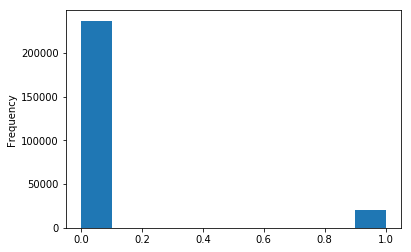

In [19]:
df_imputed_train['TARGET'].astype(int).plot.hist();

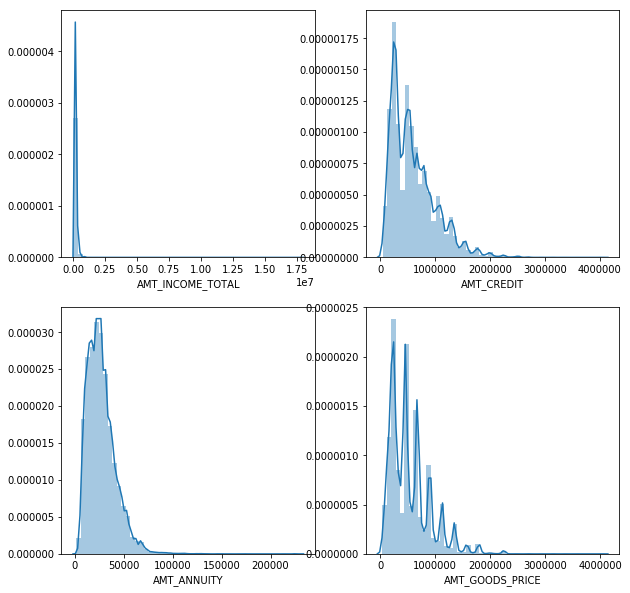

In [20]:
#Visualizing the numerical data
f, axes = plt.subplots(2, 2,figsize=(10,10))
sns.distplot(df_imputed_train['AMT_INCOME_TOTAL'], ax=axes[0,0])
sns.distplot(df_imputed_train['AMT_CREDIT'], ax=axes[0,1])
sns.distplot(df_imputed_train['AMT_ANNUITY'], ax=axes[1,0])
sns.distplot(df_imputed_train['AMT_GOODS_PRICE'], ax=axes[1,1])

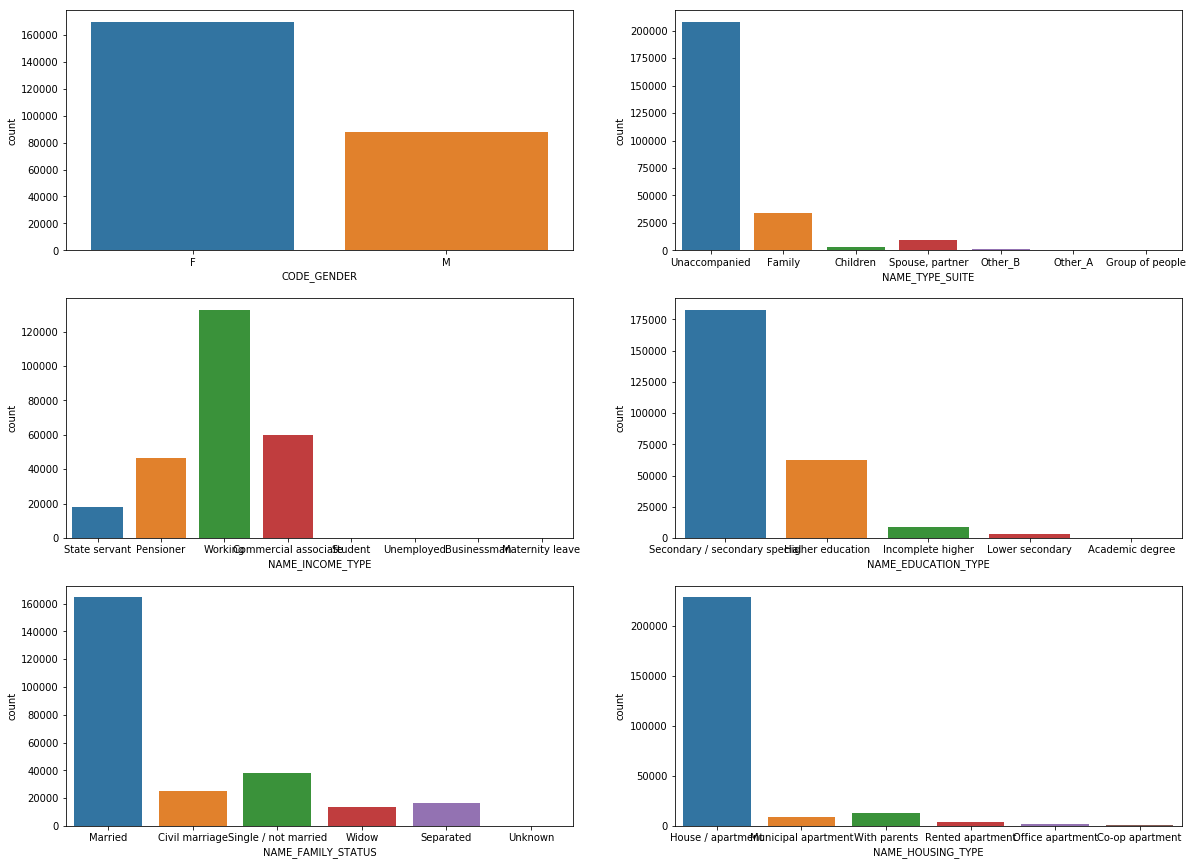

In [21]:
#Visualizing the categorical data
f, axes = plt.subplots(3, 2,figsize=(20,15))
sns.countplot(df_imputed_train['CODE_GENDER'], ax=axes[0,0])
sns.countplot(df_imputed_train['NAME_TYPE_SUITE'], ax=axes[0,1])
sns.countplot(df_imputed_train['NAME_INCOME_TYPE'], ax=axes[1,0])
sns.countplot(df_imputed_train['NAME_EDUCATION_TYPE'], ax=axes[1,1])
sns.countplot(df_imputed_train['NAME_FAMILY_STATUS'], ax=axes[2,0])
sns.countplot(df_imputed_train['NAME_HOUSING_TYPE'], ax=axes[2,1])


Bivariate Analysis

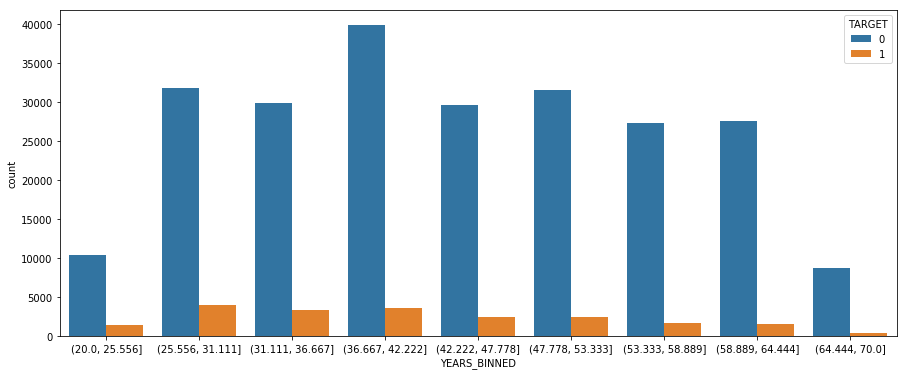

In [22]:
#Checking the number of people churned w.r.t Age
plt.figure(figsize = (15,6))
sns.countplot(x = 'YEARS_BINNED', hue = 'TARGET', data = df_imputed_train)

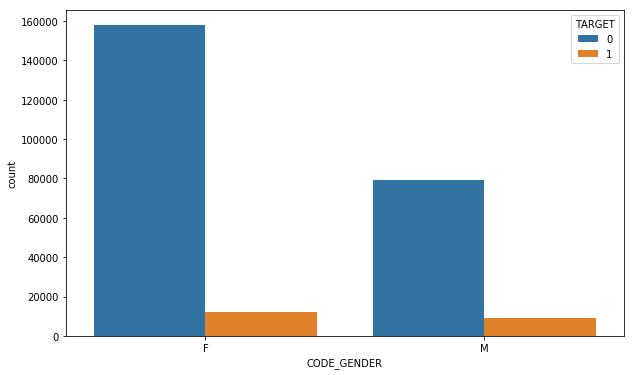

In [23]:
#Checking the number of people churned w.r.t Gender
plt.figure(figsize = (10,6))
sns.countplot(x = 'CODE_GENDER', hue = 'TARGET', data = df_imputed_train)

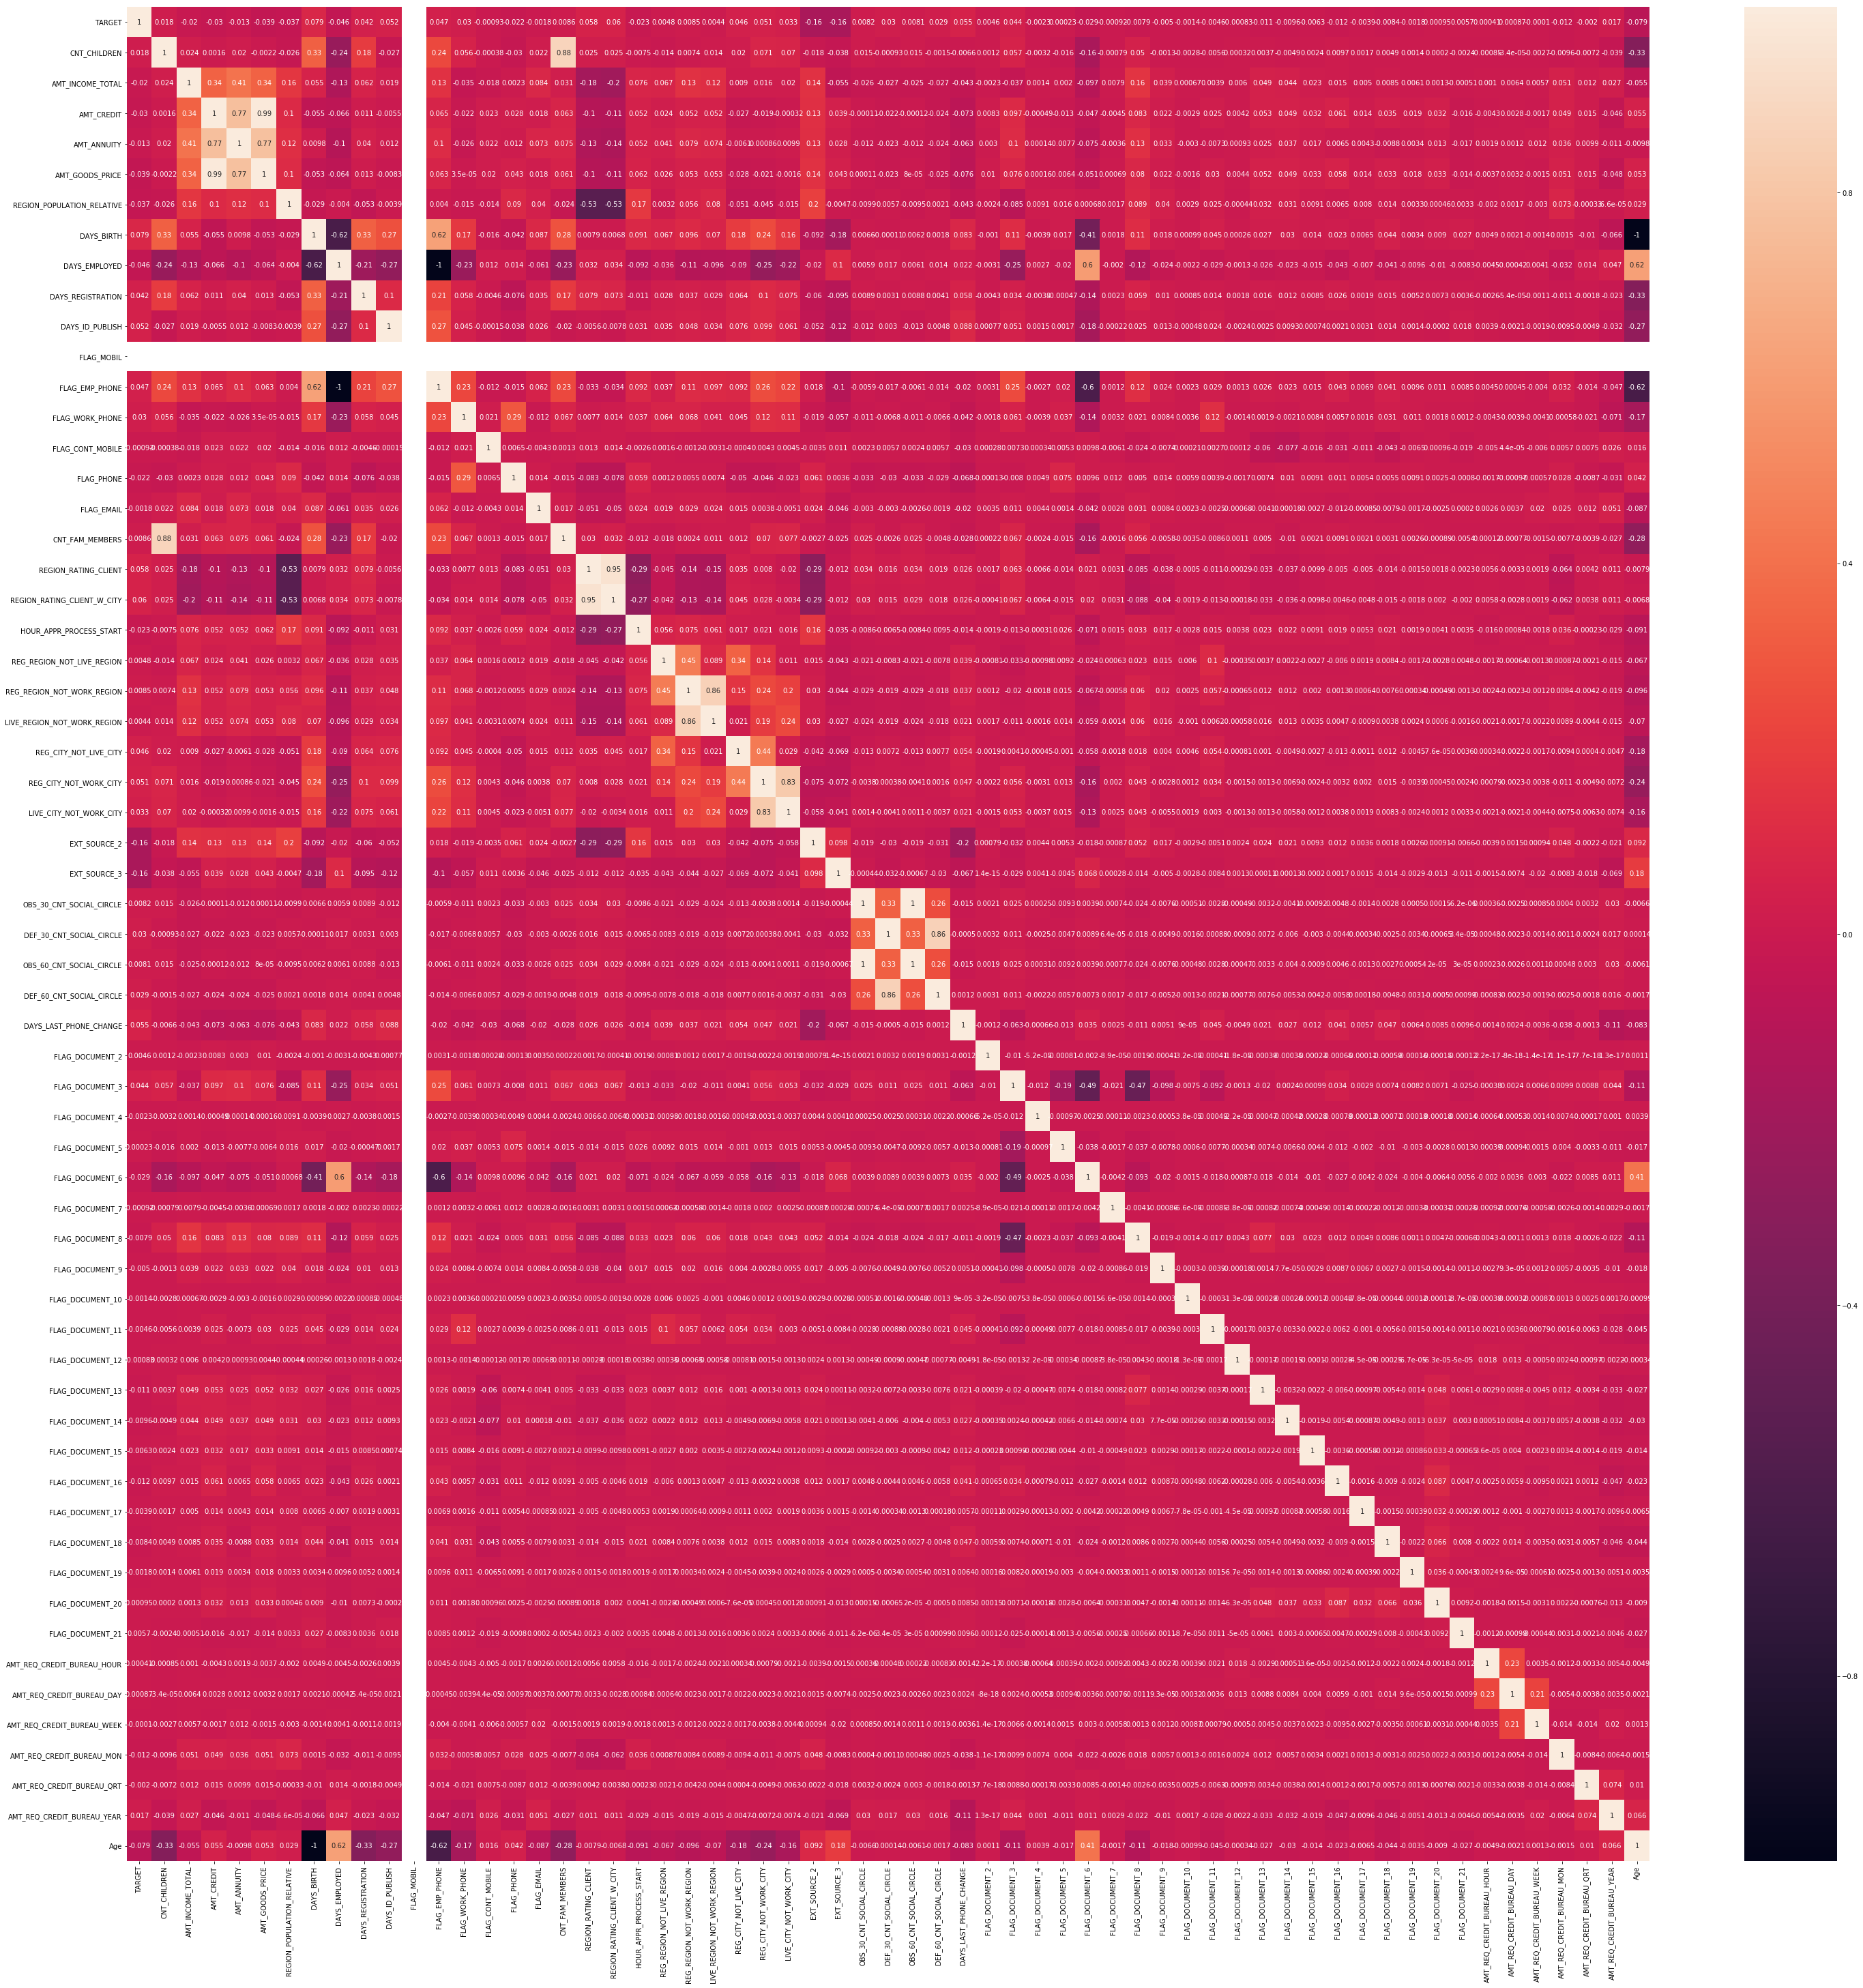

In [24]:
#checking the correlation
plt.figure(figsize = (50, 50))
sns.heatmap(df_imputed_train.corr(),annot = True)
plt.show()

In [25]:
# Number of classes in Categorical columns
for col in df_cat:
    print(col)
    print(df_cat[col].nunique())

NAME_CONTRACT_TYPE
2
CODE_GENDER
2
FLAG_OWN_CAR
2
FLAG_OWN_REALTY
2
NAME_TYPE_SUITE
7
NAME_INCOME_TYPE
8
NAME_EDUCATION_TYPE
5
NAME_FAMILY_STATUS
6
NAME_HOUSING_TYPE
6
OCCUPATION_TYPE
18
WEEKDAY_APPR_PROCESS_START
7
ORGANIZATION_TYPE
57


In [27]:
df_imputed_train = pd.get_dummies(df_imputed_train, columns=['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR','FLAG_OWN_REALTY',
                    'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
                    'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'], drop_first=True)
df_imputed_train.shape

(257512, 149)

In [28]:
df_imputed_test = pd.get_dummies(df_imputed_test, columns=['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR','FLAG_OWN_REALTY',
                    'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
                    'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'], drop_first=True)
df_imputed_test.shape

(49999, 147)

In [29]:
X = df_imputed_train.drop(['TARGET','YEARS_BINNED'], axis = 1)
y = df_imputed_train['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)


In [30]:
#Scaling the data
scaler = StandardScaler()
variables = X_train.select_dtypes(include =['float64', 'int64'])
var_cols = variables.columns
X_train[var_cols] = scaler.fit_transform(X_train[var_cols])

In [31]:
#Scaling the data
scaler = StandardScaler()
variables = X_test.select_dtypes(include =['float64', 'int64'])
var_cols = variables.columns
X_test[var_cols] = scaler.fit_transform(X_test[var_cols])

In [32]:
#Scaling the data
scaler = StandardScaler()
variables = df_imputed_test.select_dtypes(include =['float64', 'int64'])
var_cols = variables.columns
df_imputed_test[var_cols] = scaler.fit_transform(df_imputed_test[var_cols])

In [33]:
#Selecting features using lasso regularization
sel_ = SelectFromModel(LogisticRegression(C=0.01, penalty='l1'))
sel_.fit(X_train, y_train)

SelectFromModel(estimator=LogisticRegression(C=0.01, class_weight=None,
                                             dual=False, fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='warn',
                                             n_jobs=None, penalty='l1',
                                             random_state=None, solver='warn',
                                             tol=0.0001, verbose=0,
                                             warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [34]:
#Checking the number of selected features
selected_feat = X_train.columns[(sel_.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 147
selected features: 54


In [35]:
#Removing the unwanted features from regularization results
X_train_selected = sel_.transform(X_train)
X_test_selected = sel_.transform(X_test)
df_imputed_test_sel = sel_.transform(df_imputed_test)
X_train_selected.shape, X_test_selected.shape

((180258, 54), (77254, 54))

Model Building

In [36]:
#Using Logistic regression model to train the data
logreg = LogisticRegression()
logreg.fit(X_train_selected, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test_selected)[:, 1]

In [38]:
confusion = confusion_matrix(y_test, y_pred )
confusion

array([[70953,    71],
       [ 6163,    67]], dtype=int64)

In [39]:
accuracy_score(y_test, y_pred)

0.9193051492479354

In [40]:
f1_score(y_test, y_pred)

0.021042713567839197

In [41]:
recall_score(y_test, y_pred)

0.010754414125200642

In [42]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [43]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred, drop_intermediate = False )

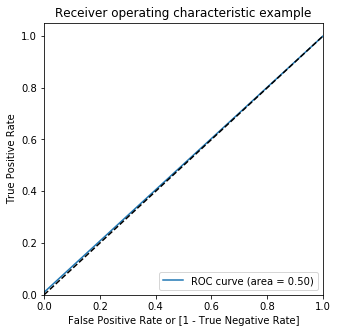

In [44]:
draw_roc(y_test, y_pred)

In [45]:
# train model
rfc = RandomForestClassifier().fit(X_train_selected, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test_selected)

In [46]:
accuracy_score(y_test, rfc_pred)

0.9177388873068061

In [47]:
f1_score(y_test, rfc_pred)

0.025755020695998773

In [48]:
recall_score(y_test, rfc_pred)

0.01348314606741573

In [49]:
fpr, tpr, thresholds = roc_curve(y_test, rfc_pred, drop_intermediate = False )

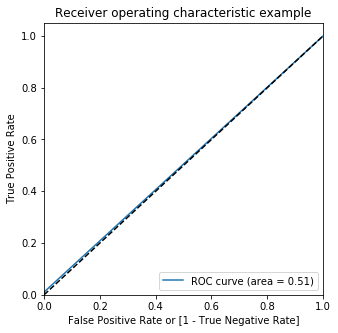

In [50]:
draw_roc(y_test, rfc_pred)

In [51]:
churn = (sum(df_train['TARGET'])/len(df_train['TARGET'].index))*100
churn

8.076905153934574

In [52]:
#import imblearn
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train, y_train = sm.fit_sample(X_train, y_train)

In [53]:
smote = LogisticRegression()

smote_pred = smote.fit(X_train, y_train)

In [54]:
smote_pred = smote.predict(X_test)

In [55]:
accuracy_score(y_test, smote_pred)

0.6809615036114635

In [56]:
f1_score(y_test, smote_pred)

0.25237358570691903

In [57]:
recall_score(y_test, smote_pred)

0.6677367576243981

In [58]:
fpr, tpr, thresholds = roc_curve(y_test, smote_pred, drop_intermediate = False )

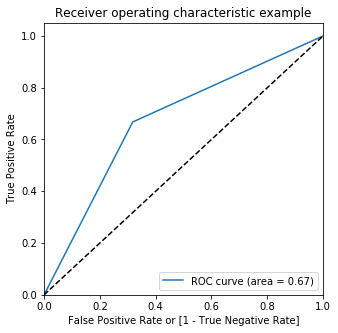

In [59]:
draw_roc(y_test, smote_pred)

In [60]:
predictions = smote.predict(df_imputed_test)
predictions_proba = smote.predict_proba(df_imputed_test)[:, 1]

In [61]:
pred_final = pd.DataFrame({'TARGET':predictions})
pred_final['SK_ID_CURR'] = df_test1['SK_ID_CURR']
pred_final = pred_final[['SK_ID_CURR', 'TARGET']]
pred_final.head()

,SK_ID_CURR,TARGET
0,100002,1
1,100003,0
2,100004,0
3,100006,0
4,100007,1


In [63]:
pred_final.to_csv('Submission.csv')